<a href="https://colab.research.google.com/github/hongphuong298/hongphuong_ead/blob/main/B%E1%BA%A2NH16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

# data_science_bowl_2018_path = kagglehub.competition_download('data-science-bowl-2018')

# print('Data source import complete.')


Data source import complete.


In [2]:
from google.colab import files

# Upload file kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lethihongphuong","key":"3d84c164e05706a93d0e9f59f611618e"}'}

In [3]:
import os
import shutil

# Đường dẫn tới thư mục và tệp
destination_path = '/root/.kaggle/kaggle.json'

# Tạo thư mục .kaggle nếu chưa có
os.makedirs('/root/.kaggle', exist_ok=True)



# Di chuyển tệp kaggle.json vào thư mục .kaggle
shutil.move('kaggle.json', destination_path)

'/root/.kaggle/kaggle.json'

In [4]:
# Cấp quyền cho file để sử dụng
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
# rm -rf /content/data-science-bowl-2018

In [5]:
!kaggle competitions download -c data-science-bowl-2018


 98% 350M/358M [00:03<00:00, 135MB/s]
100% 358M/358M [00:03<00:00, 118MB/s]


In [6]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.9/269.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [7]:
import os
import time
import copy
from collections import defaultdict
import torch
import shutil
import pandas as pd
from skimage import io, transform
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from torch import nn
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
import cv2
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss,Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn.functional as F
from PIL import Image
from torch import nn
import zipfile
import tqdm
import random

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def reset_seed():
  torch.manual_seed(42)
  random.seed(42)
  torch.cuda.manual_seed(42)
reset_seed()

In [8]:
!git clone https://github.com/SLDGroup/EMCAD.git

Cloning into 'EMCAD'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 195 (delta 7), reused 0 (delta 0), pack-reused 177 (from 1)
Receiving objects: 100% (195/195), 2.02 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [9]:

# Đường dẫn đến file zip
zip_path = '/content/data-science-bowl-2018.zip'

# Thư mục đích để giải nén
extract_to = '/content/data-science-bowl-2018'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(extract_to, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to: {extract_to}")


Dataset extracted to: /content/data-science-bowl-2018


In [ ]:
# rm -rf /content/EMCAD/data/*

In [10]:
import zipfile
import os

# Đường dẫn đến file zip
zip_path_tr = '/content/data-science-bowl-2018/stage1_train.zip'

# Thư mục đích để giải nén
extract_tr_to = '/content/EMCAD/data'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(extract_tr_to, exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile(zip_path_tr, 'r') as zip_ref:
    zip_ref.extractall(extract_tr_to)

print(f"Dataset extracted to: {extract_tr_to}")

Dataset extracted to: /content/EMCAD/data


In [11]:
seed = 42
np.random.seed = seed

img_size = 256
IMG_WIDTH = img_size
IMG_HEIGHT = img_size
IMG_CHANNELS = 3

Cloning into 'EMCAD'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 195 (delta 7), reused 0 (delta 0), pack-reused 177 (from 1)
Receiving objects: 100% (195/195), 2.02 MiB | 2.97 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [12]:
cd /content/EMCAD

/content/EMCAD


In [13]:
!pip install -r /content/EMCAD/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for warmup-scheduler: filename=warmup_scheduler-0.3-py3-none-any.whl size=2971 sha256=10af9255ef3ec7d9dabf9d53a25f8dd666acb2c28a8da24c9e165828e606d095
  Stored in directory: /root/.cache/pip/wheels/59/01/9e/d1820991c32916e9808c940f572b462f3e46427f3e76c4d852
  Created wheel for medpy: filename=MedPy-0.5.2-cp310-cp310-linux_x86_64.whl size=762836 sha256=6f1e992a5d38d49add10cc1bfaae90b3693fcbac57a5d1833da3eb52b9f192cc
  Sto

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/EMCAD/lib/

/content/EMCAD/lib


In [18]:
import argparse
import logging
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from EMCAD.lib.networks import EMCADNet


In [19]:
import sys
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from skimage import io, transform
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [15]:
!mkdir /content/EMCAD/pretrained_pth/pvt

In [16]:
ls /content/EMCAD/pretrained_pth/pvt

In [20]:
import os
os.chdir('/content/EMCAD/lib/')

##################################33


In [21]:
import os
import numpy as np
import logging
from tqdm import tqdm
from skimage import io, transform
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
from albumentations import Compose, HorizontalFlip, Normalize
from albumentations.pytorch import ToTensorV2

# Hàm tạo augmentations
def get_transforms(mean, std):
    return Compose([
        HorizontalFlip(p=0.5),
        Normalize(mean=mean, std=std, p=1.0),
        ToTensorV2()
    ])

# Dataset class
class NucleiData(Dataset):
    def __init__(self, path):
        self.path = path
        self.folders = os.listdir(path)
        self.transforms = get_transforms(mean=0.5, std=0.5)

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        image_folder = os.path.join(self.path, self.folders[idx], 'images/')
        mask_folder = os.path.join(self.path, self.folders[idx], 'masks/')
        image_path = os.path.join(image_folder, os.listdir(image_folder)[0])

        # Read and preprocess image
        img = io.imread(image_path)[:, :, :3].astype('float32')
        img = transform.resize(img, (128, 128))

        # Get mask
        mask = self.get_mask(mask_folder, 128, 128)

        # Apply transformations
        augmented = self.transforms(image=img, mask=mask)
        img = augmented['image']  # [3, 128, 128]
        mask = augmented['mask']


        mask = mask.permute(2, 0, 1)  # Change from [H, W, C] to [C, H, W]

        # print("Image size after transform: ", img.shape)      # Should be [3, 128, 128]
        # print("Mask size after transform: ", mask.shape)      # Should be [1, 128, 128]


        return {
            "image": img.clone().detach().float(),
            "label": mask.clone().detach().float()

        }

    def get_mask(self, mask_folder, IMG_HEIGHT, IMG_WIDTH):
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.float32)
        for mask_ in os.listdir(mask_folder):
            mask_ = io.imread(os.path.join(mask_folder, mask_))
            mask_ = transform.resize(mask_, (IMG_HEIGHT, IMG_WIDTH))
            mask_ = np.expand_dims(mask_, axis=-1)
            mask = np.maximum(mask, mask_)
        return mask

In [ ]:
ls /content/EMCAD/data

00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/
003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/
00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/
0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed/
01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf/
0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21/
0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426/
02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339/
03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776/
03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe/
03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a/
0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd/
04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e/
05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13/
0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275/
05a8f65ebd

In [22]:
#loading the data
base_dir = '/content/EMCAD/data/'
data = NucleiData(base_dir)

In [23]:
data_loader = DataLoader(data, batch_size=10, shuffle=True)

for batch in data_loader:
    images = batch['image']
    labels = batch['label']

    print(type(images), type(labels))  # Kiểm tra kiểu dữ liệu
    print(images.shape, labels.shape)  # Kiểm tra kích thước
    break

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 3, 128, 128]) torch.Size([10, 1, 128, 128])


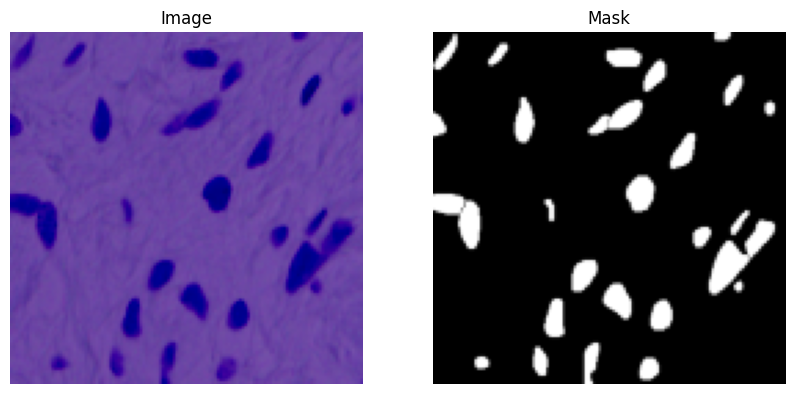

In [24]:


# Lấy một mẫu từ dataset
sample = data[0]  # Lấy mẫu đầu tiên (có thể thay đổi index)

# Lấy ảnh và mặt nạ từ sample
img = sample['image'].permute(1, 2, 0).numpy()  # Chuyển từ [C, H, W] sang [H, W, C]
mask = sample['label'][0].numpy()               # Mặt nạ [1, H, W] thành [H, W]

# Hiển thị ảnh và mặt nạ
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.show()


In [25]:
print(data.__len__())
data.__getitem__(0)

670


{'image': tensor([[[0.4111, 0.3857, 0.3895,  ..., 0.4049, 0.4066, 0.3959],
          [0.4158, 0.3939, 0.3803,  ..., 0.4187, 0.4286, 0.4025],
          [0.4171, 0.3970, 0.3732,  ..., 0.4155, 0.4334, 0.4282],
          ...,
          [0.3923, 0.4065, 0.4033,  ..., 0.3908, 0.3972, 0.4007],
          [0.3566, 0.4033, 0.3976,  ..., 0.3868, 0.4050, 0.4124],
          [0.3324, 0.3922, 0.4074,  ..., 0.4200, 0.4157, 0.4159]],
 
         [[0.2584, 0.2532, 0.2863,  ..., 0.2904, 0.2667, 0.2602],
          [0.2741, 0.2511, 0.2586,  ..., 0.2870, 0.2862, 0.2665],
          [0.2773, 0.2570, 0.2477,  ..., 0.2622, 0.2903, 0.2860],
          ...,
          [0.2431, 0.2565, 0.2654,  ..., 0.2530, 0.2555, 0.2472],
          [0.1993, 0.2484, 0.2603,  ..., 0.2439, 0.2613, 0.2656],
          [0.1707, 0.2458, 0.2679,  ..., 0.2632, 0.2759, 0.2706]],
 
         [[0.6351, 0.6345, 0.6353,  ..., 0.6423, 0.6275, 0.6190],
          [0.6360, 0.6260, 0.6244,  ..., 0.6570, 0.6455, 0.6289],
          [0.6423, 0.6254, 0.62

In [26]:
for img, msk in data:
    print(type(img), type(msk))  # Check the types
    break

<class 'str'> <class 'str'>


In [ ]:

trainset, valset = random_split(data, [580, 90])

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=10, shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=valset, batch_size=10)

In [ ]:
cd /content/EMCAD/utils


/content/EMCAD/utils


In [ ]:
ls /content/EMCAD/utils

dataloader.py       format_conversion.py  preprocess_synapse_data_3d.py  transforms.py
dataset_ACDC.py     joint_transforms.py   preprocess_synapse_data.py     utils.py
dataset_synapse.py  misc.py               README.md


In [ ]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
# from utils.dataset_nuclei import NucleiData
# from utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume
from EMCAD.lib.networks import EMCADNet
from tqdm.notebook import tqdm  # Import tqdm cho Jupyter Notebook

In [ ]:
from EMCAD.utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume

In [ ]:
# rm -rf /content/EMCAD/lib/EMCAD

In [ ]:
import os
import shutil
import logging
import sys
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from tensorboardX import SummaryWriter
# from utils.dataset_nuclei import NucleiData
# from utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume
from EMCAD.lib.networks import EMCADNet
from tqdm.notebook import tqdm

In [35]:
from EMCAD.utils.utils import powerset, one_hot_encoder, DiceLoss, val_single_volume


In [51]:
def trainer_nuclei(args, model, snapshot_path):
    print("okok")
    logging.basicConfig(filename=snapshot_path + "/log.txt", level=logging.INFO,
                        format='[%(asctime)s.%(msecs)03d] %(message)s', datefmt='%H:%M:%S')
    logging.getLogger().addHandler(logging.StreamHandler())
    logging.info(str(args))


    base_lr = args['base_lr']
    num_classes = args['num_classes']
    batch_size = args['batch_size'] * args['n_gpu']
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and DataLoader setup
    data = NucleiData(args['volume_path'])
    trainset, valset = random_split(data, [580, 90])
    train_loader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=valset, batch_size=batch_size)

    model.to(device)

    dice_loss = DiceLoss(num_classes)
    ce_loss = CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=0.0001)
    writer = SummaryWriter(snapshot_path + '/log')

    max_epoch = args['max_epochs']
    best_performance = 0.0

    # Deep Supervision Setup
    out_idxs = list(range(num_classes))
    ss = [[x] for x in out_idxs]

    for epoch_num in range(max_epoch):
        model.train()
        epoch_loss = 0
        with tqdm(train_loader, desc=f'Epoch {epoch_num + 1}/{max_epoch}', unit='batch') as pbar:
            for i_batch, sampled_batch in enumerate(pbar):
                image_batch = sampled_batch['image'].to(device)
                label_batch = sampled_batch['label'].squeeze(1).to(device)

                # Forward pass
                outputs = model(image_batch)

                # Handle different output formats
                if isinstance(outputs, list):
                    # For deep supervision output
                    total_loss = 0
                    for output in outputs:
                        # Ensure output and label have matching dimensions
                        if output.dim() != label_batch.dim():
                            if output.dim() == 4:  # [B, C, H, W]
                                label_batch = label_batch.squeeze(1)  # Remove extra dimension if present
                            elif output.dim() == 5:  # [D, B, C, H, W]
                                output = output.mean(dim=0)  # Average over deep supervision outputs

                        loss_ce = ce_loss(output, label_batch.long())
                        loss_dice = dice_loss(output, label_batch, softmax=True)
                        total_loss += (0.3 * loss_ce + 0.7 * loss_dice)

                    loss = total_loss / len(outputs)  # Average loss across all outputs
                else:
                    # For single output
                    if outputs.dim() != label_batch.dim():
                        if outputs.dim() == 4:  # [B, C, H, W]
                            label_batch = label_batch.squeeze(1)
                        elif outputs.dim() == 5:  # [D, B, C, H, W]
                            outputs = outputs.mean(dim=0)

                    loss_ce = ce_loss(outputs, label_batch.long())
                    loss_dice = dice_loss(outputs, label_batch, softmax=True)
                    loss = 0.3 * loss_ce + 0.7 * loss_dice

                # Backpropagation and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()
                pbar.set_postfix(loss=loss.item())
                writer.add_scalar('info/loss', loss.item(), epoch_num * len(train_loader) + i_batch)

        avg_loss = epoch_loss / len(train_loader)
        logging.info(f'Epoch [{epoch_num + 1}/{max_epoch}] Average Loss: {avg_loss:.4f}')

        # Save model checkpoint
        save_mode_path = os.path.join(snapshot_path, f'epoch_{epoch_num + 1}.pth')
        torch.save(model.state_dict(), save_mode_path)

        # Validation
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# if(best_performance <= performance):
#             best_performance = performance
#             save_mode_path = os.path.join(snapshot_path, 'best.pth')
#             torch.save(model.state_dict(), save_mode_path)
#             logging.info("save model to {}".format(save_mode_path))



        performance = inference(args, model, best_performance, val_loader)

        #
        if performance > best_performance:
            best_performance = performance
            best_model_path = os.path.join(snapshot_path, 'best_model.pth')
            torch.save(model.state_dict(), best_model_path)
            logging.info(f"Best model saved at: {best_model_path}")

        logging.info(f"Epoch {epoch_num + 1} completed.")

    writer.close()
    return "Training Finished!"



def inference(args, model, best_performance, val_loader):
    # db_test = Synapse_dataset(base_dir=args.volume_path, split="test_vol", list_dir=args.list_dir, nclass=args.num_classes)

    # testloader = DataLoader(db_test, batch_size=1, shuffle=False, num_workers=1)
    logging.info("{} test iterations per epoch".format(len(val_loader)))
    model.eval()
    metric_list = 0.0

    # Bỏ qua "case" khi gọi val_single_volume
    for i_batch, sampled_batch in tqdm(enumerate(val_loader), total=len(val_loader), desc="Testing", unit="batch"):
        h, w = sampled_batch["image"].size()[2:]
        image, label = sampled_batch["image"], sampled_batch["label"]

        # Bỏ qua case_name
        metric_i = val_single_volume(image, label, model, classes=args['num_classes'], patch_size=[args.['img_size'], args.['img_size']])

        metric_list += np.array(metric_i)

    metric_list = metric_list / len(db_test)
    performance = np.mean(metric_list, axis=0)
    logging.info('Testing performance in val model: mean_dice : %f, best_dice : %f' % (performance, best_performance))
    return performance



# def inference(args, model, best_performance):
#     model.eval()
#     all_metrics = []

#     with torch.no_grad():
#         with tqdm(val_loader, desc="Testing", unit='batch') as pbar:
#             for sampled_batch in pbar:
#                 image = sampled_batch['image'].to(device)  # [B, C, H, W]
#                 label = sampled_batch['label'].to(device)  # [B, 1, H, W]
#                 # In ra kích thước của image và label
#                 print(f"Image shape: {image.shape}")
#                 print(f"Label shape: {label.shape}")
#                 print(f"Image type: {type(image)}")
#                 print(f"Label type: {type(label)}")


#                 # Process each sample in the batch individually
#                 for i in range(image.size(0)):
#                     single_image = image[i:i+1]  # Keep batch dimension
#                     single_label = label[i:i+1]  # Keep batch dimension
#                     print(f"Single image shape: {single_image.shape}")
#                     print(f"Single label shape: {single_label.shape}")
#                     print(f"Single image type: {type(single_image)}")
#                     print(f"Single label type: {type(single_label)}")
#                     outputs = model(single_image)
#                     print(f"Outputs type: {type(outputs)}")
#                     print(f"Number of outputs: {len(outputs)}")
#                     print(f"Outputs type: {type(outputs)}")
#                     # In kích thước của từng output nếu là một list
#                     if isinstance(outputs, list):
#                         for idx, output in enumerate(outputs):
#                             print(f"Output {idx} shape: {output.shape}")
#                     else:
#                         print(f"Single output shape: {outputs.shape}")
#  # Output có thể là một list với nhiều phần tử
#                     dice_scores = []

#                     # Duyệt qua từng đầu ra của mô hình và tính Dice score cho mỗi đầu ra
#                     for output in outputs:
#                         dice_score = val_single_volume(
#                             output,
#                             single_label,
#                             model,
#                             args['num_classes'],
#                             patch_size=args.get('patch_size', [256, 256])
#                         )
#                         dice_scores.append(np.mean(dice_score))

#                     # Tính Dice score trung bình từ tất cả các đầu ra
#                     mean_dice = np.mean(dice_scores)
#                     all_metrics.append(mean_dice)
#                     pbar.set_postfix(dice_score=f'{mean_dice:.4f}')

#     final_performance = np.mean(all_metrics)
#     logging.info(f'Mean Dice score on test set: {final_performance:.4f}')
#     return final_performance

# def inference(args, model, val_loader, device):
#     model.eval()  # Đặt mô hình ở chế độ đánh giá (evaluation mode)

#     all_metrics = []

#     with torch.no_grad():
#         with tqdm(val_loader, desc="Testing", unit='batch') as pbar:
#             for sampled_batch in pbar:
#                 image = sampled_batch['image'].to(device)
#                 label = sampled_batch['label'].to(device)

#                 # Dự đoán từ mô hình
#                 outputs = model(image)

#                 # Chọn đầu ra cuối cùng từ danh sách outputs
#                 if isinstance(outputs, list):
#                     final_output = outputs[0]  # Hoặc outputs[-1] tùy vào cách mô hình trả về
#                 else:
#                     final_output = outputs

#                 # Tính toán các chỉ số hiệu suất (ví dụ: Dice score) cho từng lớp
#                 dice_scores = val_single_volume(
#                     final_output.cpu().detach().numpy(),
#                     label.cpu().detach().numpy(),
#                     model,
#                     args['num_classes'],
#                     patch_size=args.get('patch_size', [256, 256])
#                 )

#                 mean_dice = np.mean(dice_scores)
#                 all_metrics.append(mean_dice)
#                 pbar.set_postfix(dice_score=f'{mean_dice:.4f}')

#     final_performance = np.mean(all_metrics)
#     logging.info(f'Mean Dice score on test set: {final_performance:.4f}')

#     return final_performance



# def inference(args, model, val_loader, device):
#     """Perform inference and calculate metrics for the validation set."""

#     model.eval()
#     all_metrics = []
#     num_classes = args['num_classes']
#     with torch.no_grad():
#         with tqdm(val_loader, desc="Validating", unit='batch') as pbar:
#             for i_batch, sampled_batch in enumerate(pbar):
#                 image = sampled_batch['image'].to(device)
#                 label = sampled_batch['label'].to(device)

#                 # In ra kích thước của các đầu vào
#                 print(f'Validation Batch {i_batch}: Image Size: {image.size()}, Label Size: {label.size()}')

#                 # Tiến hành dự đoán
#                 outputs = model(image)

#                 # Nếu có deep supervision, outputs sẽ là một danh sách các tensor
#                 if isinstance(outputs, list):
#                     # Đối với deep supervision, duyệt qua từng output
#                     all_dice_scores = []
#                     for output in outputs:
#                         print(f'num_classes: {num_classes}')

#                         # Tính toán các chỉ số với hàm val_single_volume
#                         print(f'Calling val_single_volume with: output={final_output.size()}, label={label.size()}, num_classes={num_classes}')

#                         metrics = val_single_volume(output, label, num_classes)

#                         # Tính Dice score trung bình cho tất cả các lớp
#                         mean_dice = np.mean([m[0] for m in metrics])  # Chỉ số Dice score
#                         all_dice_scores.append(mean_dice)

#                     # Tính Dice score trung bình cho tất cả các output
#                     mean_dice_score = np.mean(all_dice_scores)
#                 else:
#                     # Nếu chỉ có một output
#                     print("ok!")
#                     final_output = outputs
#                     metrics = val_single_volume(final_output, label, num_classes)
#                     mean_dice_score = np.mean([m[0] for m in metrics])

#                 all_metrics.append(mean_dice_score)

#                 # Cập nhật thanh tiến trình
#                 pbar.set_postfix(dice_score=f'{mean_dice_score:.4f}')

#     # Tính toán kết quả cuối cùng
#     final_performance = np.mean(all_metrics)
#     logging.info(f'Mean Dice score on validation set: {final_performance:.4f}')

#     # In ra các chỉ số cho từng lớp
#     for class_idx, metric in enumerate(metrics, 1):
#         dice, hd95, jaccard, asd = metric
#         logging.info(f'Class {class_idx} - Dice score: {dice:.4f}, HD95: {hd95:.4f}, Jaccard: {jaccard:.4f}, ASD: {asd:.4f}')

#     return final_performance


In [ ]:
import json
import csv

In [ ]:
import os
path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
print(f"File tồn tại: {os.path.exists(path)}")

File tồn tại: True


In [29]:
!nvidia-smi


Tue Dec 24 12:45:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# from EMCAD.lib.pvtv2 import pvt_v2_b0, pvt_v2_b1, pvt_v2_b2, pvt_v2_b3, pvt_v2_b4, pvt_v2_b5
# from EMCAD.lib.resnet import resnet18, resnet34, resnet50, resnet101, resnet152
# from EMCAD.lib.decoders import EMCAD


# class EMCADNet(nn.Module):
#     def __init__(self, num_classes=1, kernel_sizes=[1,3,5], expansion_factor=2, dw_parallel=True, add=True, lgag_ks=3, activation='relu', encoder='pvt_v2_b2', pretrain=True):
#         super(EMCADNet, self).__init__()

#         # conv block to convert single channel to 3 channels
#         self.conv = nn.Sequential(
#             nn.Conv2d(1, 3, kernel_size=1),
#             nn.BatchNorm2d(3),
#             nn.ReLU(inplace=True)
#         )

#         # backbone network initialization with pretrained weight
#         if encoder == 'pvt_v2_b0':
#             self.backbone = pvt_v2_b0()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[256, 160, 64, 32]
#         elif encoder == 'pvt_v2_b1':
#             self.backbone = pvt_v2_b1()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b2':
#             self.backbone = pvt_v2_b2()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b3':
#             self.backbone = pvt_v2_b3()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b4':
#             self.backbone = pvt_v2_b4()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'pvt_v2_b5':
#             self.backbone = pvt_v2_b5()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]
#         elif encoder == 'resnet18':
#             self.backbone = resnet18(pretrained=pretrain)
#             channels=[512, 256, 128, 64]
#         elif encoder == 'resnet34':
#             self.backbone = resnet34(pretrained=pretrain)
#             channels=[512, 256, 128, 64]
#         elif encoder == 'resnet50':
#             self.backbone = resnet50(pretrained=pretrain)
#             channels=[2048, 1024, 512, 256]
#         elif encoder == 'resnet101':
#             self.backbone = resnet101(pretrained=pretrain)
#             channels=[2048, 1024, 512, 256]
#         elif encoder == 'resnet152':
#             self.backbone = resnet152(pretrained=pretrain)
#             channels=[2048, 1024, 512, 256]
#         else:
#             print('Encoder not implemented! Continuing with default encoder pvt_v2_b2.')
#             self.backbone = pvt_v2_b2()
#             path = '/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth'
#             channels=[512, 320, 128, 64]

#         if pretrain==True and 'pvt_v2' in encoder:
#             save_model = torch.load(path)
#             model_dict = self.backbone.state_dict()
#             state_dict = {k: v for k, v in save_model.items() if k in model_dict.keys()}
#             model_dict.update(state_dict)
#             self.backbone.load_state_dict(model_dict)

#         print('Model %s created, param count: %d' %
#                      (encoder+' backbone: ', sum([m.numel() for m in self.backbone.parameters()])))

#         #   decoder initialization
#         self.decoder = EMCAD(channels=channels, kernel_sizes=kernel_sizes, expansion_factor=expansion_factor, dw_parallel=dw_parallel, add=add, lgag_ks=lgag_ks, activation=activation)

#         print('Model %s created, param count: %d' %
#                      ('EMCAD decoder: ', sum([m.numel() for m in self.decoder.parameters()])))

#         self.out_head4 = nn.Conv2d(channels[0], num_classes, 1)
#         self.out_head3 = nn.Conv2d(channels[1], num_classes, 1)
#         self.out_head2 = nn.Conv2d(channels[2], num_classes, 1)
#         self.out_head1 = nn.Conv2d(channels[3], num_classes, 1)

#     def forward(self, x, mode='test'):

#         # if grayscale input, convert to 3 channels
#         if x.size()[1] == 1:
#             x = self.conv(x)

#         # encoder
#         x1, x2, x3, x4 = self.backbone(x)
#         #print(x1.shape, x2.shape, x3.shape, x4.shape)

#         # decoder
#         dec_outs = self.decoder(x4, [x3, x2, x1])

#         # prediction heads
#         p4 = self.out_head4(dec_outs[0])
#         p3 = self.out_head3(dec_outs[1])
#         p2 = self.out_head2(dec_outs[2])
#         p1 = self.out_head1(dec_outs[3])

#         p4 = F.interpolate(p4, scale_factor=32, mode='bilinear')
#         p3 = F.interpolate(p3, scale_factor=16, mode='bilinear')
#         p2 = F.interpolate(p2, scale_factor=8, mode='bilinear')
#         p1 = F.interpolate(p1, scale_factor=4, mode='bilinear')

#         if mode == 'test':
#             return [p4, p3, p2, p1]

#         return [p4, p3, p2, p1]



# if __name__ == '__main__':
#     model = EMCADNet().cuda()
#     input_tensor = torch.randn(1, 3, 352, 352).cuda()

#     P = model(input_tensor)
#     print(P[0].size(), P[1].size(), P[2].size(), P[3].size())



<ipython-input-52-26e2590d6c5e>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_model = torch.load(path)


Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515
torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352]) torch.Size([1, 1, 352, 352])


In [52]:

args = {
    'volume_path': '/content/EMCAD/data/',
    'num_classes': 2,
    'batch_size': 10,
    'max_epochs': 10,
    'base_lr': 1e-4,
    'n_gpu': 1,
    'img_size': 256,
    'list_dir': './train_val_split',
    'kernel_sizes': [1, 3, 5],
    'expansion_factor': 2,
    'dw_parallel': True,
    'activation': 'relu',
    'encoder': 'pvt_v2_b2',
    'pretrain': True
}

# Tạo mô hình EMCADNet với các tham số cấu hình
model = EMCADNet(
    num_classes=args['num_classes'],  # Số lớp trong phân đoạn
    kernel_sizes=args['kernel_sizes'],  # Kích thước kernel cho decoder
    expansion_factor=args['expansion_factor'],  # Hệ số mở rộng cho decoder
    dw_parallel=args['dw_parallel'],  # Chế độ song song cho convolution
    add=True,  # Thêm các lớp residual
    lgag_ks=3,  # Kích thước kernel cho LGAG
    activation=args['activation'],  # Hàm kích hoạt
    encoder=args['encoder'],  # Encoder bạn muốn sử dụng
    pretrain=args['pretrain'] # Có tải trọng lượng pretrained hay không
).cuda()  # Chuyển mô hình sang GPU nếu có

# Load pre-trained weights if pretrain is True
if args['pretrain']:
    pretrained_dict = torch.load('/content/EMCAD/pretrained_pth/pvt/pvt_v2_b2.pth') # Confirmed absolute path

    # Remove the 'module.' prefix from the keys in the pretrained_dict
    pretrained_dict = {k.replace('module.', ''): v for k, v in pretrained_dict.items()}

    model_dict = model.state_dict()

    # Filter out unnecessary keys and update the model's state dict
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict and v.shape == model_dict[k].shape}
    model_dict.update(pretrained_dict)

    # Load the updated state dict into the model
    model.load_state_dict(model_dict, strict=False)  # strict=False allows loading a subset of weights

# Đường dẫn lưu mô hình
snapshot_path = '/content/EMCAD/check/checkpoints'
os.makedirs(snapshot_path, exist_ok=True)

# Bắt đầu huấn luyện
trainer_nuclei(args, model, snapshot_path)

/content/EMCAD/lib/networks.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  save_model = torch.load(path)
<ipython-input-52-fa45b4863fe5>:33: FutureWarning: You are usi

Model pvt_v2_b2 backbone:  created, param count: 24849856
Model EMCAD decoder:  created, param count: 1913515
okok


Testing:   0%|          | 0/9 [00:01<?, ?batch/s]


AttributeError: 'dict' object has no attribute 'img_size'

In [48]:
print(model)

EMCADNet(
  (conv): Sequential(
    (0): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (backbone): pvt_v2_b2(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=Tru

In [ ]:
!zip -r /content/EMCAD.zip /content/EMCAD


Streaming output truncated to the last 5000 lines.
  adding: content/EMCAD/data/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e/masks/afb84c01cb46017ed55991cbd3655b8b162a8025f98364dab3f4011d9a26bb66.png (deflated 16%)
  adding: content/EMCAD/data/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e/masks/9cb2e1fb4e5147f5a37bd438e0dbf4292a255e7455296b300ff706db5945f77e.png (deflated 22%)
  adding: content/EMCAD/data/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e/images/ (stored 0%)
  adding: content/EMCAD/data/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e/images/1d02c4b5921e916b9ddfb2f741fd6cf8d0e571ad51eb20e021c826b5fb87350e.png (deflated 0%)
  adding: content/EMCAD/data/b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229/ (stored 0%)
  adding: content/EMCAD/data/b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229/masks/ (stored 0%)
  adding: content/EMCAD/data/b1e3aeb0c56261c17eb71c747d116057b8

In [ ]:
from google.colab import files
files.download('/content/EMCAD.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# import torch
# import torch.nn as nn
# import numpy as np
# from medpy import metric
# from scipy.ndimage import zoom
# import seaborn as sns
# from PIL import Image
# import matplotlib.pyplot as plt
# from segmentation_mask_overlay import overlay_masks
# import matplotlib.colors as mcolors

# import SimpleITK as sitk
# import pandas as pd

# from thop import profile
# from thop import clever_format
# from ptflops import get_model_complexity_info

# def powerset(seq):
#     """
#     Returns all the subsets of this set. This is a generator.
#     """
#     if len(seq) <= 1:
#         yield seq
#         yield []
#     else:
#         for item in powerset(seq[1:]):
#             yield [seq[0]]+item
#             yield item

# def clip_gradient(optimizer, grad_clip):
#     """
#     For calibrating misalignment gradient via cliping gradient technique
#     :param optimizer:
#     :param grad_clip:
#     :return:
#     """
#     for group in optimizer.param_groups:
#         for param in group['params']:
#             if param.grad is not None:
#                 param.grad.data.clamp_(-grad_clip, grad_clip)

# def adjust_lr(optimizer, init_lr, epoch, decay_rate=0.1, decay_epoch=30):
#     decay = decay_rate ** (epoch // decay_epoch)
#     for param_group in optimizer.param_groups:
#         param_group['lr'] *= decay

# class AvgMeter(object):
#     def __init__(self, num=40):
#         self.num = num
#         self.reset()

#     def reset(self):
#         self.val = 0
#         self.avg = 0
#         self.sum = 0
#         self.count = 0
#         self.losses = []

#     def update(self, val, n=1):
#         self.val = val
#         self.sum += val * n
#         self.count += n
#         self.avg = self.sum / self.count
#         self.losses.append(val)

#     def show(self):
#         return torch.mean(torch.stack(self.losses[np.maximum(len(self.losses)-self.num, 0):]))

# def CalParams(model, input_tensor):
#     """
#     Usage:
#         Calculate Params and FLOPs via [THOP](https://github.com/Lyken17/pytorch-OpCounter)
#     Necessarity:
#         from thop import profile
#         from thop import clever_format
#     :param model:
#     :param input_tensor:
#     :return:
#     """
#     flops, params = profile(model, inputs=(input_tensor,))
#     flops, params = clever_format([flops, params], "%.3f")
#     print('[Statistics Information]\nFLOPs: {}\nParams: {}'.format(flops, params))

# def one_hot_encoder(input_tensor,dataset,n_classes = None):
#     tensor_list = []
#     if dataset == 'MMWHS':
#         dict = [0,205,420,500,550,600,820,850]
#         for i in dict:
#             temp_prob = input_tensor == i
#             tensor_list.append(temp_prob.unsqueeze(1))
#         output_tensor = torch.cat(tensor_list, dim=1)
#         return output_tensor.float()
#     else:
#         for i in range(n_classes):
#             temp_prob = input_tensor == i
#             tensor_list.append(temp_prob.unsqueeze(1))
#         output_tensor = torch.cat(tensor_list, dim=1)
#         return output_tensor.float()

# class DiceLoss(nn.Module):
#     def __init__(self, n_classes):
#         super(DiceLoss, self).__init__()
#         self.n_classes = n_classes

#     def _one_hot_encoder(self, input_tensor):
#         tensor_list = []
#         for i in range(self.n_classes):
#             temp_prob = input_tensor == i  # * torch.ones_like(input_tensor)
#             tensor_list.append(temp_prob.unsqueeze(1))
#         output_tensor = torch.cat(tensor_list, dim=1)
#         return output_tensor.float()

#     def _dice_loss(self, score, target):
#         target = target.float()
#         smooth = 1e-5
#         intersect = torch.sum(score * target)
#         y_sum = torch.sum(target * target)
#         z_sum = torch.sum(score * score)
#         loss = (2 * intersect + smooth) / (z_sum + y_sum + smooth)
#         loss = 1 - loss
#         return loss

#     def forward(self, inputs, target, weight=None, softmax=False):
#         if softmax:
#             inputs = torch.softmax(inputs, dim=1)
#         target = self._one_hot_encoder(target)
#         if weight is None:
#             weight = [1] * self.n_classes
#         assert inputs.size() == target.size(), 'predict {} & target {} shape do not match'.format(inputs.size(), target.size())
#         class_wise_dice = []
#         loss = 0.0
#         for i in range(0, self.n_classes):
#             dice = self._dice_loss(inputs[:, i], target[:, i])
#             class_wise_dice.append(1.0 - dice.item())
#             loss += dice * weight[i]
#         return loss / self.n_classes

# def calculate_metric_percase(pred, gt):
#     pred[pred > 0] = 1
#     gt[gt > 0] = 1
#     if pred.sum() > 0 and gt.sum()>0:
#         dice = metric.binary.dc(pred, gt)
#         hd95 = metric.binary.hd95(pred, gt)
#         jaccard = metric.binary.jc(pred, gt)
#         asd = metric.binary.assd(pred, gt)
#         return dice, hd95, jaccard, asd
#     elif pred.sum() > 0 and gt.sum()==0:
#         return 1, 0, 1, 0
#     else:
#         return 0, 0, 0, 0

# def calculate_dice_percase(pred, gt):
#     pred[pred > 0] = 1
#     gt[gt > 0] = 1
#     if pred.sum() > 0 and gt.sum()>0:
#         dice = metric.binary.dc(pred, gt)
#         return dice
#     elif pred.sum() > 0 and gt.sum()==0:
#         return 1
#     else:
#         return 0

# def test_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1, class_names=None):
#     image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()
#     if class_names==None:
#         mask_labels = np.arange(1,classes)
#     else:
#         mask_labels = class_names
#     cmaps = mcolors.CSS4_COLORS
#     my_colors=['red','darkorange','yellow','forestgreen','blue','purple','magenta','cyan','deeppink', 'chocolate', 'olive','deepskyblue','darkviolet']
#     cmap = {k: cmaps[k] for k in sorted(cmaps.keys()) if k in my_colors[:classes-1]}
#     if len(image.shape) == 3:
#         prediction = np.zeros_like(label)
#         for ind in range(image.shape[0]):
#             slice = image[ind, :, :]
#             x, y = slice.shape[0], slice.shape[1]
#             if x != patch_size[0] or y != patch_size[1]:
#                 slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
#             input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
#             net.eval()
#             with torch.no_grad():
#                 P = net(input)
#                 outputs = P[-1]
#                 out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#                 out = out.cpu().detach().numpy()
#                 if x != patch_size[0] or y != patch_size[1]:
#                     pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
#                 else:
#                     pred = out
#                 prediction[ind] = pred
#                 # saving the final output as a PNG file
#                 #print(test_save_path + '/'+case + '' +str(ind))
#                 #Image.fromarray((pred/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_pred.png')
#                 #Image.fromarray((image[ind, :, :] * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_img.png')
#                 #Image.fromarray((label[ind, :, :]/8 * 255).astype(np.uint8)).save(test_save_path + '/'+case + '' +str(ind)+'_gt.png')
#                 #cmap = plt.cm.tab20(np.arange(len(mask_labels)))

#                 lbl = label[ind, :, :]
#                 masks = []
#                 for i in range(1, classes):
#                     masks.append(lbl==i)
#                 preds_o = []
#                 for i in range(1, classes):
#                     preds_o.append(pred==i)

#                 fig_gt = overlay_masks(image[ind, :, :], masks, labels=mask_labels, colors=cmap, mask_alpha=0.5)
#                 fig_pred = overlay_masks(image[ind, :, :], preds_o, labels=mask_labels, colors=cmap, mask_alpha=0.5)
#                 # Do with that image whatever you want to do.
#                 fig_gt.savefig(test_save_path + '/' + case + '_' +str(ind) + '_gt.png', bbox_inches="tight", dpi=300)
#                 fig_pred.savefig(test_save_path + '/' + case + '_' +str(ind) + '_pred.png', bbox_inches="tight", dpi=300)

#     else:
#         input = torch.from_numpy(image).unsqueeze(
#             0).unsqueeze(0).float().cuda()
#         net.eval()
#         with torch.no_grad():
#             P = net(input)
#             outputs = P[-1]
#             out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
#             prediction = out.cpu().detach().numpy()
#     metric_list = []
#     for i in range(1, classes):
#         metric_list.append(calculate_metric_percase(prediction == i, label == i))

#     if test_save_path is not None:
#         img_itk = sitk.GetImageFromArray(image.astype(np.float32))
#         prd_itk = sitk.GetImageFromArray(prediction.astype(np.float32))
#         lab_itk = sitk.GetImageFromArray(label.astype(np.float32))
#         img_itk.SetSpacing((1, 1, z_spacing))
#         prd_itk.SetSpacing((1, 1, z_spacing))
#         lab_itk.SetSpacing((1, 1, z_spacing))
#         sitk.WriteImage(prd_itk, test_save_path + '/'+case + "_pred.nii.gz")
#         sitk.WriteImage(img_itk, test_save_path + '/'+ case + "_img.nii.gz")
#         sitk.WriteImage(lab_itk, test_save_path + '/'+ case + "_gt.nii.gz")
#     return metric_list

# # def val_single_volume(image, label, net, classes, patch_size=[256, 256], test_save_path=None, case=None, z_spacing=1):
# #     image, label = image.squeeze(0).cpu().detach().numpy(), label.squeeze(0).cpu().detach().numpy()

# #     if len(image.shape) == 3:
# #         prediction = np.zeros_like(label)
# #         for ind in range(image.shape[0]):
# #             slice = image[ind, :, :]
# #             x, y = slice.shape[0], slice.shape[1]
# #             if x != patch_size[0] or y != patch_size[1]:
# #                 slice = zoom(slice, (patch_size[0] / x, patch_size[1] / y), order=3)  # previous using 0
# #             input = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().cuda()
# #             net.eval()
# #             with torch.no_grad():
# #                 P = net(input)
# #                 outputs = 0.0
# #                 outputs = P[-1]
# #                 out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
# #                 out = out.cpu().detach().numpy()
# #                 if x != patch_size[0] or y != patch_size[1]:
# #                     pred = zoom(out, (x / patch_size[0], y / patch_size[1]), order=0)
# #                 else:
# #                     pred = out
# #                 prediction[ind] = pred
# #     else:
# #         input = torch.from_numpy(image).unsqueeze(
# #             0).unsqueeze(0).float().cuda()
# #         net.eval()
# #         with torch.no_grad():
# #             P = net(input)
# #             outputs = P[-1]
# #             out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
# #             prediction = out.cpu().detach().numpy()
# #     metric_list = []
# #     for i in range(1, classes):
# #         metric_list.append(calculate_dice_percase(prediction == i, label == i))
# #     return metric_list
# def val_single_volume(pred, label, net, classes, patch_size=[256, 256]):
#     """Validate single volume.

#     Args:
#         pred: Prediction tensor
#         label: Ground truth label tensor
#         net: Neural network model
#         classes: Number of classes
#         patch_size: Patch size for processing

#     Returns:
#         Dice score
#     """
#     # Move tensors to CPU and detach
#     pred = pred.cpu().detach()
#     label = label.cpu().detach()

#     # Apply softmax for multi-class
#     if classes > 1:
#         pred = torch.sigmoid(pred)
#         pred = pred.argmax(dim=1) # Get predicted classes

#         pred = pred.view(-1)
#         label = label.squeeze(1).view(-1)
#     else:
#         pred = (pred > 0.5).float()
#         pred = pred.squeeze(dim=1).view(-1)
#         label = label.squeeze(dim=1).view(-1)

#     # Calculate dice score
#     intersection = (pred * label).sum()
#     union = pred.sum() + label.sum()
#     dice = (2. * intersection + 1e-5) / (union + 1e-5)

#     return dice.item()

# def horizontal_flip(image):
#     image = image[:, ::-1, :]
#     return image

# def vertical_flip(image):
#     image = image[::-1, :, :]
#     return image

# def tta_model(model, image):
#     n_image = image
#     h_image = horizontal_flip(image)
#     v_image = vertical_flip(image)

#     n_mask = model.predict(np.expand_dims(n_image, axis=0))[0]
#     h_mask = model.predict(np.expand_dims(h_image, axis=0))[0]
#     v_mask = model.predict(np.expand_dims(v_image, axis=0))[0]

#     n_mask = n_mask
#     h_mask = horizontal_flip(h_mask)
#     v_mask = vertical_flip(v_mask)

#     mean_mask = (n_mask + h_mask + v_mask) / 3.0
#     return mean_mask

# def cal_params_flops(model, size, logger):
#     input = torch.randn(1, 3, size, size).cuda()
#     flops, params = profile(model, inputs=(input,))
#     print('flops',flops/1e9)			## 打印计算量
#     print('params',params/1e6)			## 打印参数量

#     total = sum(p.numel() for p in model.parameters())
#     print("Total params: %.2fM" % (total/1e6))
#     logger.info(f'flops: {flops/1e9}, params: {params/1e6}, Total params: : {total/1e6:.4f}')

# # Example function to calculate and print GMACs and parameter count for a given model
# def print_model_stats(model, input_size=(3, 224, 224)):
#     # Print model parameter count
#     total_params = sum(p.numel() for p in model.parameters())
#     print(f'Model created, param count: {total_params}')

#     # Calculate GMACs using ptflops
#     macs, params = get_model_complexity_info(model, input_size, as_strings=True, print_per_layer_stat=True)

#     # Display GMACs and params
#     print(f'Model: {macs} GMACs, {params} parameters')

In [ ]:
!zip -r /content/EMCAD.zip /content/EMCAD


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/b52400346650faf0979870e16e6aa5c35c3d89851e5ede58d59e4f6381ec97c8.png (deflated 26%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/c312bf4d4777ca16a022218d714a397a274aaa795c065aafc3710ae692fecb33.png (deflated 22%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/253a066135c22372edab5978e193c97d2bfab6b2dd10c22a67b251a873e079b2.png (deflated 21%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/ccbde9327aca2cf66f603886b0d77a1220522aba3ab0ce9ee6b6859b2cb517fa.png (deflated 26%)
  adding: content/EMCAD/data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832/masks/50553d8a51387c633af0eecb4453419ed9c2908a27053a85ec458cf8a70ca2ea.png (deflated 26%)
  adding: content/EMCAD